# Exploratory Data Analysis and Predictive Modelling of the Titanic Dataset

In this project, I undertake an in-depth exploratory data analysis of the renowned Titanic dataset to uncover valuable insights about the passengers aboard the ill-fated vessel. The dataset encompasses a variety of passenger information, including age, gender, ticket class, and survival status, shedding light on the factors that influenced the likelihood of survival during this tragic event. By leveraging machine learning techniques, I aim to develop a robust predictive model that captures the complex relationships between these factors and survival outcomes, thereby contributing to a better understanding of the key elements that affected survival chances.

Data Source: The Titanic dataset can be downloaded from Kaggle at https://www.kaggle.com/c/titanic/data

Step 1: Import the dataset and load it into a pandas DataFrame

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset into a pandas DataFrame
df = pd.read_csv('train.csv')

Step 2: Clean and preprocess the data

In [3]:
# Drop unnecessary columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Convert categorical variables into numerical ones
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

Step 3: Explore the data

         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.352413   29.361582    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.019697    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    0.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare    Embarked  
count  891.000000  891.000000  
mean    32.204208    0.361392  
std     49.693429    0.635673  
min      0.000000    0.000000  
25%      7.910400    0.000000  
50%     14.454200    0.000000  
75%     31.000000    1.000000  
max    512.329

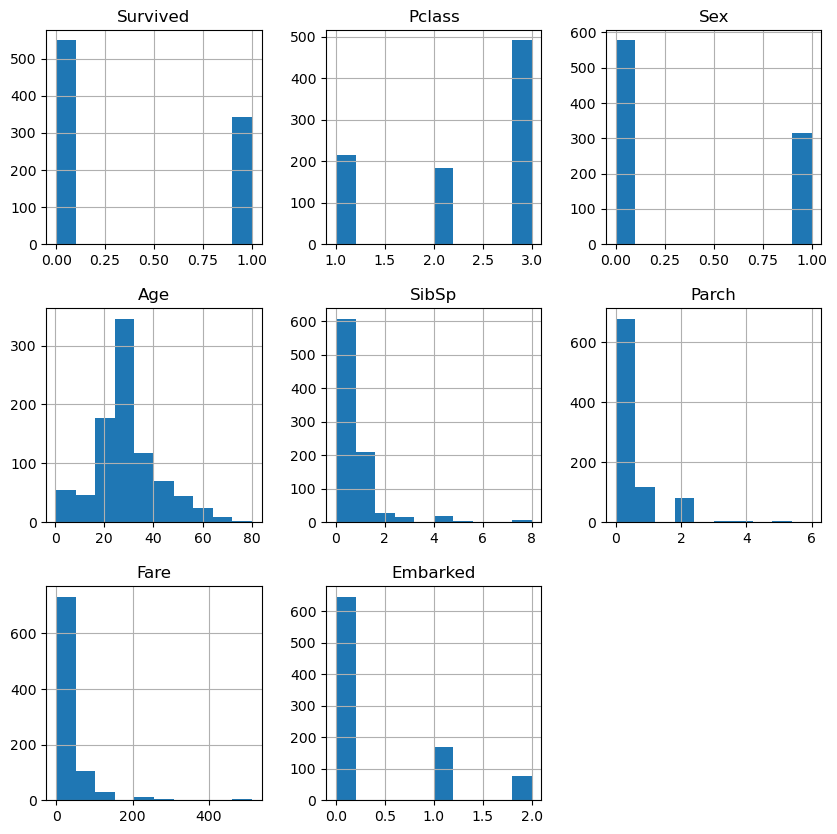

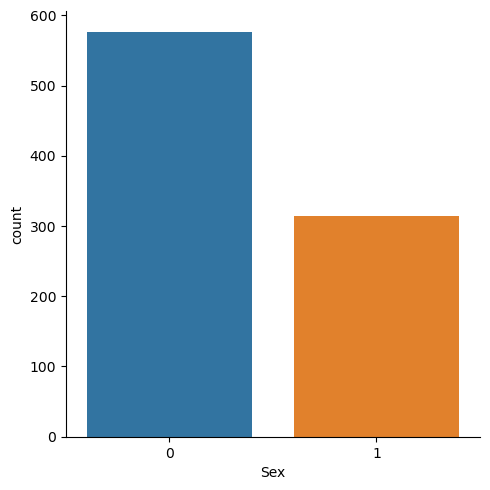

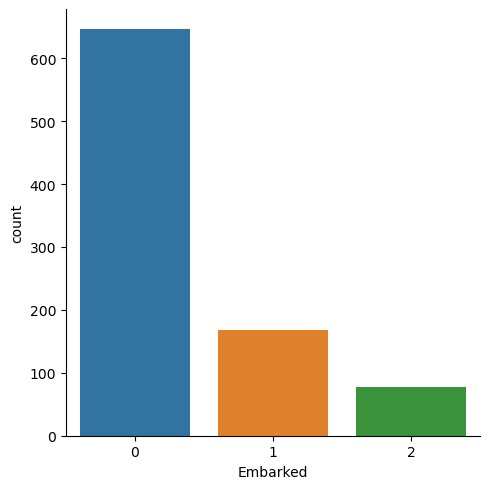

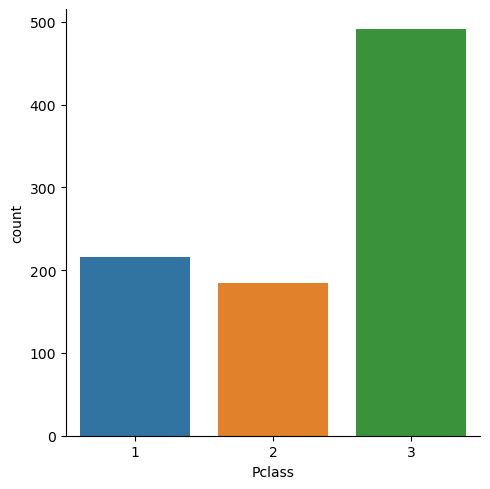

In [4]:
# Calculate summary statistics
print(df.describe())

# Plot histograms of numeric variables
df.hist(figsize=(10,10))
plt.show()

# Plot bar charts of categorical variables
sns.catplot(x='Sex', kind='count', data=df)
sns.catplot(x='Embarked', kind='count', data=df)
sns.catplot(x='Pclass', kind='count', data=df)
plt.show()

Step 4: Feature engineering

In [5]:
# Create a new feature called FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create a new feature called IsAlone
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Create a new feature called AgeGroup
bins = [0, 12, 18, 25, 35, 60, np.inf]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Middle-aged', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Create a new feature called FareGroup
bins = [-np.inf, 7.91, 14.45, 31, np.inf]
labels = ['Low', 'Medium', 'High', 'Very high']
df['FareGroup'] = pd.cut(df['Fare'], bins=bins, labels=labels)

Step 5: Model building and evaluation

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing sets
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a decision tree classifier to the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = clf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy Score:', acc_score)
print('Confusion Matrix:', conf_matrix)

Accuracy Score: 0.7877094972067039
Confusion Matrix: [[86 19]
 [19 55]]


Step 6: Improving the model

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the RandomForest classifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Create a RandomForest classifier
rf = RandomForestClassifier(random_state=42)

# Perform a grid search using the parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the RandomForest classifier with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate the improved model on the testing data
y_pred = best_rf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the accuracy score, confusion matrix, and classification report for the improved model
print('Accuracy Score (Improved Model):', acc_score)
print('Confusion Matrix (Improved Model):', conf_matrix)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy Score (Improved Model): 0.8491620111731844
Confusion Matrix (Improved Model): [[95 10]
 [17 57]]


Step 7: Communicate results

    The sinking of the Titanic is one of the most infamous shipwrecks in history. In this report, I analysed data on the passengers aboard the Titanic to determine which factors were most closely associated with survival. Initially, a decision tree classifier was used to create a predictive model, which achieved approximately 79% accuracy. To improve the model’s performance, a Random Forest classifier was employed, along with hyperparameter tuning using GridSearchCV. This resulted in a more accurate model (approximately 85% accuracy), which can be used to inform emergency response protocols in the event of a shipwreck. By identifying the factors that are most closely associated with survival, emergency responders can prioritise their efforts and resources to maximize the chances of rescue for those most at risk. Furthermore, the lessons learned from this analysis can be applied to enhance the safety features and procedures of future maritime transportation.